<a href="https://colab.research.google.com/github/Uttamdevsharma/ML_ALL_MODEL/blob/main/K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as splt
import seaborn
%matplotlib inline

In [3]:
df = pd.read_csv('/content/Mall_Customers.csv')

In [4]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
df.rename(columns={'Gender' : 'gender', "Age" : 'age' , 'Annual Income (k$)' : 'income' , 'Spending Score (1-100)' : 'score' }, inplace=True)

In [7]:
df.shape

(200, 5)

In [8]:
df.isnull().sum()

,0
CustomerID,0
gender,0
age,0
income,0
score,0


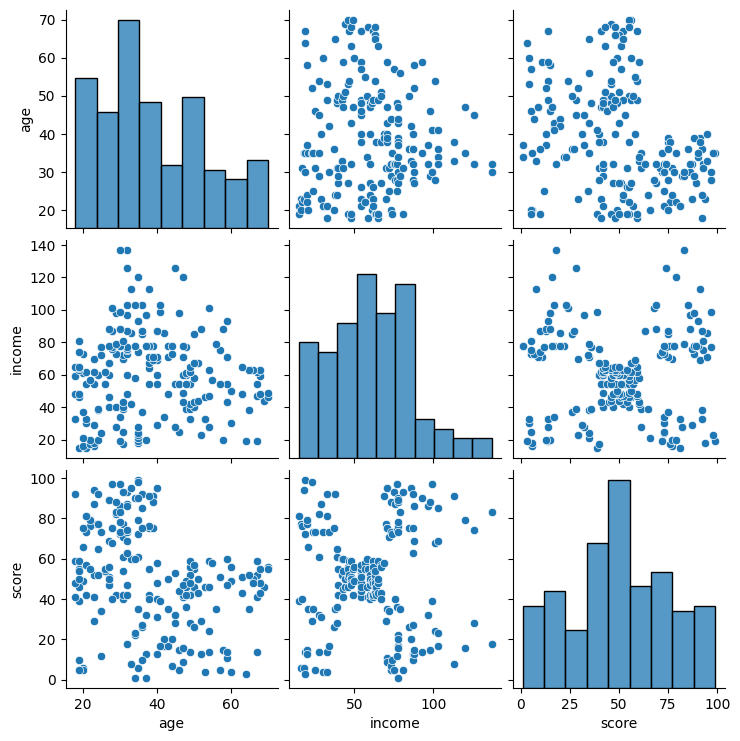

In [9]:
seaborn.pairplot(df[['age','income','score']])

In [10]:
import sklearn.cluster as cluster

In [11]:
kmeans = cluster.KMeans(n_clusters=5)

In [14]:
kmeans = kmeans.fit(df[['score' , 'income']])

In [15]:
kmeans.cluster_centers_

array([[49.7125    , 55.0875    ],
       [20.91304348, 26.30434783],
       [17.58333333, 87.75      ],
       [82.12820513, 86.53846154],
       [79.36363636, 25.72727273]])

In [16]:
df['income_clusters'] = kmeans.labels_

In [17]:
df

,CustomerID,gender,age,income,score,income_clusters
0,1,Male,19,15,39,1
1,2,Male,21,15,81,4
2,3,Female,20,16,6,1
3,4,Female,23,16,77,4
4,5,Female,31,17,40,1
...,...,...,...,...,...,...
195,196,Female,35,120,79,3
196,197,Female,45,126,28,2
197,198,Male,32,126,74,3
198,199,Male,32,137,18,2


In [18]:
df['income_clusters'].value_counts()

,count
income_clusters,
0,80
3,39
2,36
1,23
4,22


<Axes: xlabel='income', ylabel='score'>

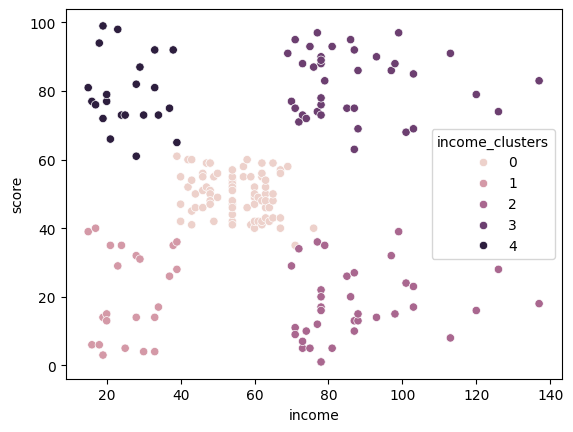

In [19]:
seaborn.scatterplot(x ='income', y='score' ,hue='income_clusters',data=df)

In [20]:
kmeans = cluster.KMeans(n_clusters=2)
kmeans = kmeans.fit(df[['age','score']])

In [21]:
kmeans.cluster_centers_

array([[46.16521739, 32.88695652],
       [28.95294118, 73.62352941]])

In [22]:
df['age_clusters'] = kmeans.labels_

In [23]:
df

,CustomerID,gender,age,income,score,income_clusters,age_clusters
0,1,Male,19,15,39,1,0
1,2,Male,21,15,81,4,1
2,3,Female,20,16,6,1,0
3,4,Female,23,16,77,4,1
4,5,Female,31,17,40,1,0
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,3,1
196,197,Female,45,126,28,2,0
197,198,Male,32,126,74,3,1
198,199,Male,32,137,18,2,0


In [26]:
df['age_clusters'].value_counts()

,count
age_clusters,
0,115
1,85


<Axes: xlabel='age', ylabel='score'>

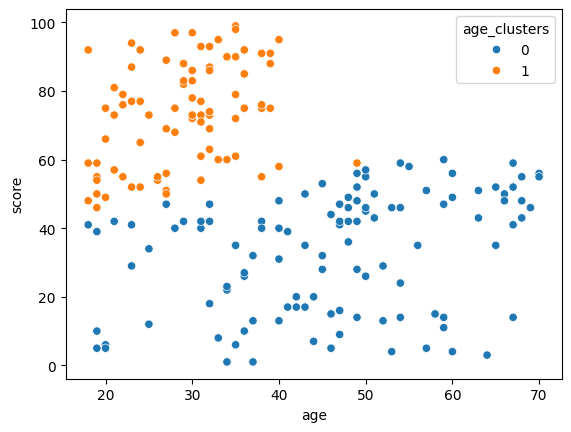

In [28]:
seaborn.scatterplot(x ='age', y='score' ,hue='age_clusters',data=df)

In [32]:
# One-hot encode the 'gender' column
df_encoded = pd.get_dummies(df, columns=['gender'])

In [33]:
# Apply KMeans clustering on 'gender' and 'score'
kmeans_gender_score = cluster.KMeans(n_clusters=2) # Assuming 2 clusters for gender
kmeans_gender_score = kmeans_gender_score.fit(df_encoded[['gender_Female', 'gender_Male', 'score']])

df['gender_score_clusters'] = kmeans_gender_score.labels_

<Axes: xlabel='gender_score_clusters', ylabel='score'>

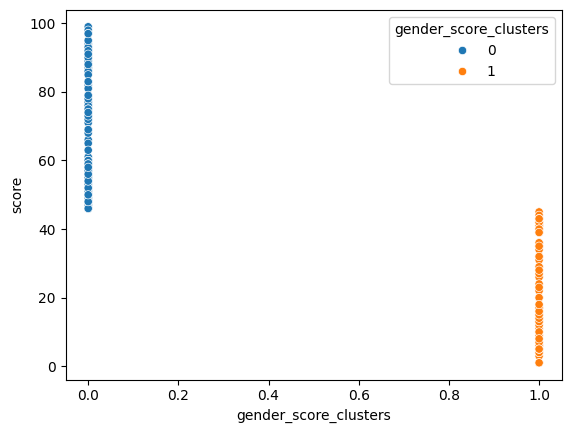

In [35]:
# Visualize the clusters
seaborn.scatterplot(x ='gender_score_clusters', y='score' ,hue='gender_score_clusters',data=df)

In [37]:
# Merge the cluster labels from df to df_encoded
df_encoded['gender_score_clusters'] = df['gender_score_clusters']

# Group by cluster and calculate the mean of the one-hot encoded gender columns
df_encoded.groupby('gender_score_clusters')[['gender_Female', 'gender_Male']].mean()

,gender_Female,gender_Male
gender_score_clusters,,
0,0.550,0.450
1,0.575,0.425
